# Convolutional Neural Network

### Packages

In [1]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D, Rescaling

# ----- Utility functions -----
from utils import load_data, plot_hist, preprocess_data

c:\Users\gusta\OneDrive\Skrivebord\Data Science\3. Semester - Data Science\Anvendt Maskinlæring\applied_ML_faelles\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [2]:
data_dir = 'C:/Users/gusta/OneDrive/Skrivebord/Data Science/3. Semester - Data Science/Anvendt Maskinlæring' # pc
#data_dir = '/Users/gustavchristensen/Documents/SDU/MSc. Data Science/3. Semester - DT/Anvendt Maskinlæring' # mac
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=5, batch_size=BATCH_SIZE)

### Architectures
- Consider and discuss alternative CNN model architectures

Before we begin building complex architectures for the CNN model, we must establish a baseline classifier which we will attempt to beat. This common-sense baseline will tell us if we are moving in the right direction. In our case, we can choose a simple random classifier with a threshold of 0.5 since we have a binary classification problem where half of the samples belong to class A and the remaining 50% belong to class B. We could also specify a 'simple' machine learning algorithm as a baseline, but although we do not do this explicitly, we will aim to beat the trained models in question 1 as CNNs has some properties that make them superior to non-deep learning algorithms and feedforward neural networks (Chollet, 2021).

At this point, the first thing we want to achieve is statistical power, i.e. to cross the threshold of our baseline classifier by developing a small model. To do so, we focus on parameters such as the loss function, batch_size, learning rate, etc. Due to the way we represent the labels, we will use the softmax activation and the loss function categorical cross entropy rather than sigmoid and binary cross entropy, however, this will not change the results of our models.

In [20]:
# ----- Relatively Simple Convnet from DLPR -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# ----- Model summary -----
model.summary()

'''
# ----- Configure model -----
model.compile(optimizer='adam',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 25,
					validation_data= val)

# ----- Plot performance -----
plot_hist(history)
'''

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856 

"\n# ----- Configure model -----\nmodel.compile(optimizer='adam',\n\t\t\t  loss='categorical_crossentropy',\n\t\t\t  metrics=['accuracy'])\n\n# ----- Train model -----\nhistory = model.fit(train,\n\t\t\t\t\tepochs = 25,\n\t\t\t\t\tvalidation_data= val)\n\n# ----- Plot performance -----\nplot_hist(history)\n"

According to Goodfellow et al. (2016) perhaps the most important hyperparameter is the learning rate, and if we only had time to tune a single parameter, it should be this one (p. 424). The learning rate controls the speed of the gradient descent process, i.e. how much to adjust the parameters in a single step (Chollet, 2021). If the learning rate is too small, results in too many iterations and the possibility of getting stuck at a local minimum. In contrary, too high of a learning rate could result in divergent behavior. Therefore, we try different values of the learning rate using the Adam optimizer. Due to time constraints of training with different optimizers and learning rates, we will only compare the Adam and Stochastic Gradient Descent (SGD) from Keras. This is reasonable because one... adaptive vs SGD

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856 

KeyboardInterrupt: 

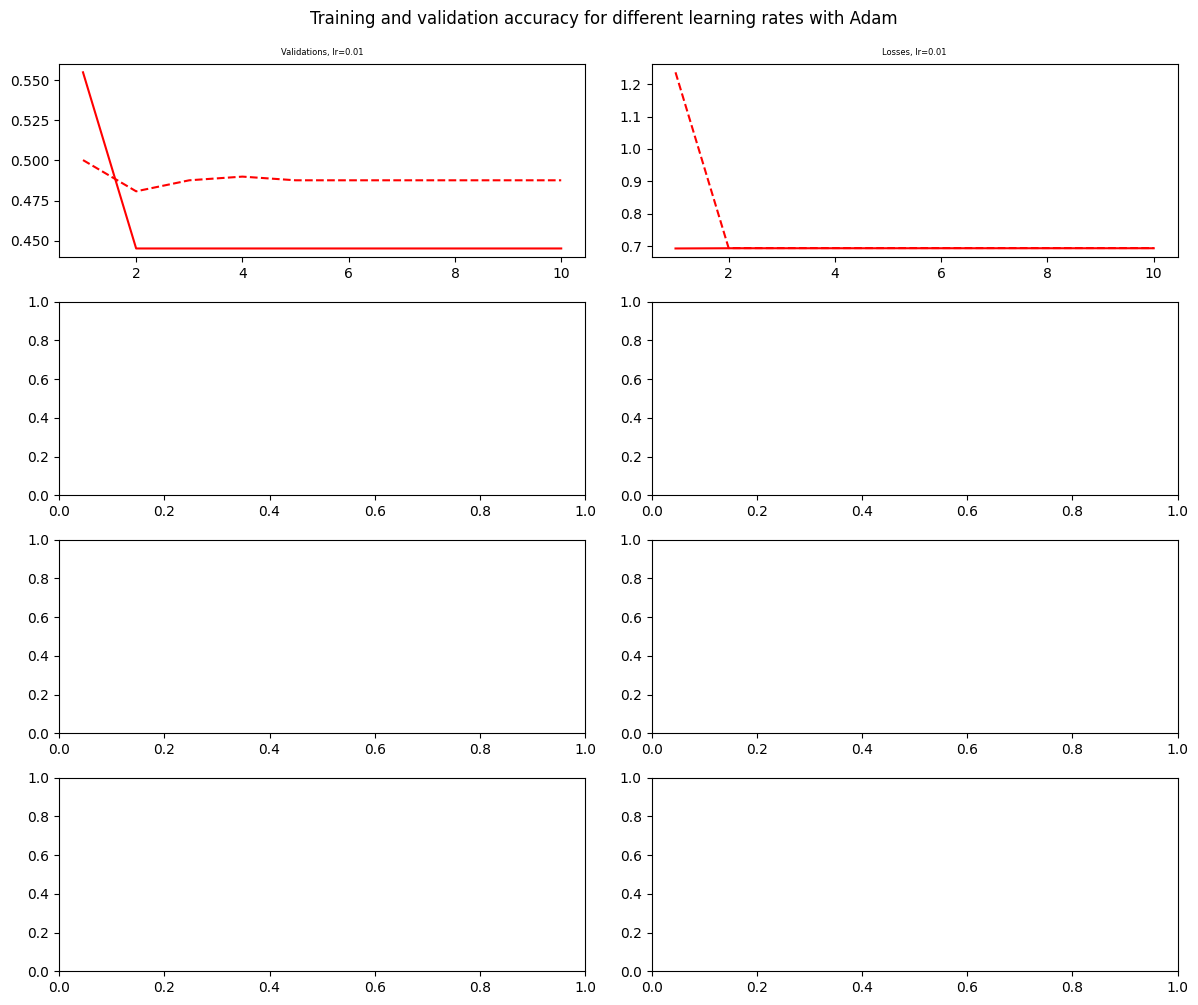

In [3]:
# ----- Relatively Simple Convnet from DLPR with different learning rates -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# ----- Model summary -----
model.summary()

# ----- Learning rates -----
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
momentum = [0.99, 0.9]
nesterov = [True, False]


# ------------------------------------------------------------ BREAK ------------------------------------------------------------

# ----- Define subplot grid -----
t=1
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)
fig.suptitle("Training and validation accuracy for different learning rates with Adam", fontsize=12, y=1)
fig.tight_layout()

# Try different learning rates for Adam optimizer
for i in range(len(learning_rates)):
	
	opt = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
	# ----- Configure model -----
	model.compile(optimizer=opt,
			  	loss='categorical_crossentropy',
			  metrics=['accuracy'])

	# ----- Train model -----
	history = model.fit(train,
						epochs=10,
						validation_data=val)

	# ----- Plot performance -----
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs = range(1, len(acc) + 1)

	axis = plt.subplot(4, 2, t)
	axis.plot(epochs, acc,'r--', label='Training accuracy')
	axis.plot(epochs, val_acc, 'r', label='Validation accuracy')
	axis.set_title('Validations, lr=' + str(learning_rates[i]), fontsize=6)

	axis = plt.subplot(4, 2, t+1)
	axis.plot(epochs, loss, 'r--', label='Training loss')
	axis.plot(epochs, val_loss, 'r', label='Validation loss')
	axis.set_title('Losses, lr=' + str(learning_rates[i]), fontsize=6)

	t=t+2

plt.show

In [ ]:
# Try different learning rates, momentum, and nesterov for SGD optimizer
for i in range(len(learning_rates)):
	
	# ----- Define subplot grid -----
	t=1
	fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
	plt.subplots_adjust(hspace=0.8)
	fig.suptitle("Model accuracy for different learning- and momentum rates for SGD", fontsize=12, y=1)

	for m in range(len(momentum)):
		for n in range(len(nesterov)):
			
			current_model = simple_model()

			opt = tf.keras.optimizers.SGD(learning_rate=learning_rates[i],
										  momentum=momentum[m],
										  nesterov=nesterov[n])

			# ----- Configure model -----
			current_model.compile(optimizer=opt,
						loss='categorical_crossentropy',
					metrics=['accuracy'])

			# ----- Train model -----
			history = current_model.fit(train,
								epochs=2,
								validation_data=val)

			# ----- Plot performance -----
			acc = history.history['accuracy']
			val_acc = history.history['val_accuracy']
			loss = history.history['loss']
			val_loss = history.history['val_loss']
			epochs = range(1, len(acc) + 1)

			axis = plt.subplot(4, 2, t)
			axis.plot(epochs, acc,'r--', label='Training accuracy')
			axis.plot(epochs, val_acc, 'r', label='Validation accuracy')
			axis.set_title('Accuracy, lr=' + str(learning_rates[i]) + ', momen=' + str(momentum[m]) + ', nest=' + str(nesterov[n]), fontsize=6)

			axis = plt.subplot(4, 2, t+1)
			axis.plot(epochs, loss, 'r--', label='Training loss')
			axis.plot(epochs, val_loss, 'r', label='Validation loss')
			axis.set_title('Losses, lr=' + str(learning_rates[i]) + ', momen=' + str(momentum[m]) + ', nest=' + str(nesterov[n]), fontsize=6)
			t=t+2

			plt.savefig('lr=' + str(learning_rates[i]) + ', momen=' + str(momentum[m]) + ', nest=' + str(nesterov[n]))

plt.show()

- Write something about the batch size

In [ ]:
# Batch size changes here


- What is overfitting and how can we mitigate it? Address the problem of overfitting.

Although the CNN has some level of generalization power, the results clearly show that the model is overfitting; despite that the training loss is decreasing, the validation is now increasing. This is a good sign in the sense that the model has sufficient representation power for the problem (Chollet, 2021).


In [55]:
Best_optimizer = optimizers.Adam(learning_rate=0.0001)

#### Smaller model

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_141 (Conv2D)         (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 47, 47, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 22, 22, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 20, 20, 128)       738

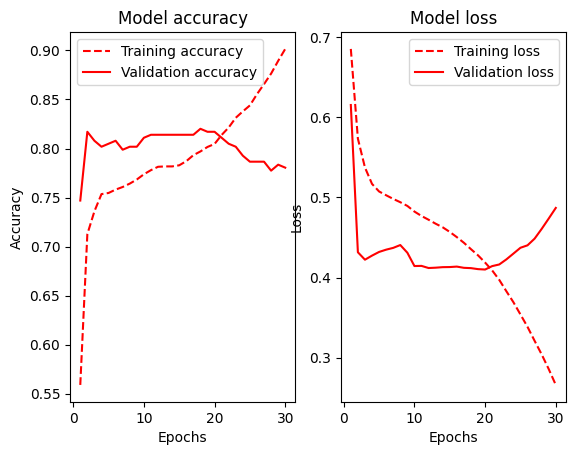

In [56]:
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x) 
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x) #Pooling layer removed and amount of filters set to 128
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)


# ----- Model summary -----
model.summary()

# ----- Configure model -----
model.compile(optimizer=Best_optimizer,
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 30,
					validation_data= val)

# ----- Plot performance -----
plot_hist(history)

# Heatmap

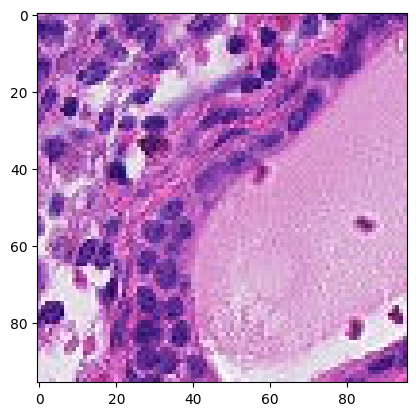

In [3]:
# Load and plot image
def prep(x):
    return x

imgs, lbs = preprocess_data(train, prep)

test_img = imgs[60]
plt.imshow(test_img)

In [4]:
# model
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# ----- Model summary -----
model.summary()

# ----- Configure model -----
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 30,
					validation_data= val)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856 

In [5]:
# New function
def get_heatmap(category, start_image):
    cell_output     = model.get_layer('dense').output # output layer
    last_conv_layer = model.get_layer('conv2d_4').output # deep convolution 
                                                         # we could use something else
    submodel = tf.keras.models.Model([model.inputs], [cell_output, last_conv_layer])

    input_img_data = start_image.copy()
    input_img_data = tf.Variable(tf.cast(input_img_data, tf.float32))

    with tf.GradientTape() as tape:
        outputs_class, outputs_conv = submodel(input_img_data)
        loss_value                  = tf.reduce_mean(outputs_class[:, category])

    grads = tape.gradient(loss_value, outputs_conv)

    cast_outputs_conv = tf.cast(outputs_conv > 0, "float32")
    cast_grads        = tf.cast(grads > 0, "float32")
    guided_grads      = cast_outputs_conv * cast_grads * grads
    outputs_conv      = outputs_conv[0]
    guided_grads      = guided_grads[0]
    
    weights           = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam               = tf.reduce_sum(tf.multiply(weights, outputs_conv), axis=-1)
    
    return cam

In [22]:
for images, labels in train.take(4):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

numpy_labels_2 = []

for label in numpy_labels:
    if label[0] == 1:
        numpy_labels_2.append(0)
    else:
        numpy_labels_2.append(1)

In [16]:
from PIL import Image
cmap = plt.get_cmap('jet')

def create_heatmap(idx):
    category, image = numpy_labels_2[idx], numpy_images[idx:(idx + 1)]

    heatmap = get_heatmap(category, image)
    heatmap = heatmap.numpy()
    heatmap = Image.fromarray(heatmap)
    heatmap = heatmap.resize((96, 96), Image.ANTIALIAS)
    #heatmap = heatmap.resize((32, 32), Image.LANCZOS)# 
    heatmap = np.array(heatmap) # back to numpy array
    heatmap = (heatmap / heatmap.max()) # to [0, 1]    
    heatmap = cmap(heatmap)
    heatmap = np.delete(heatmap, 3, 2)

    overlayed_heatmap = 0.6 * image[0] + 0.4 * heatmap
    
    return image[0], heatmap, overlayed_heatmap

def plot_heatmap():
    plt.figure(figsize=(10, 10))
    for i in range(3):
        images = create_heatmap(i)
        for j in range(3):
            ax = plt.subplot(3, 3, i * 3 + 1 + j); plt.axis('off'); plt.imshow(images[j])
    plt.show()

C:\Users\gusta\AppData\Local\Temp\ipykernel_22724\1761033284.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  heatmap = heatmap.resize((96, 96), Image.ANTIALIAS)


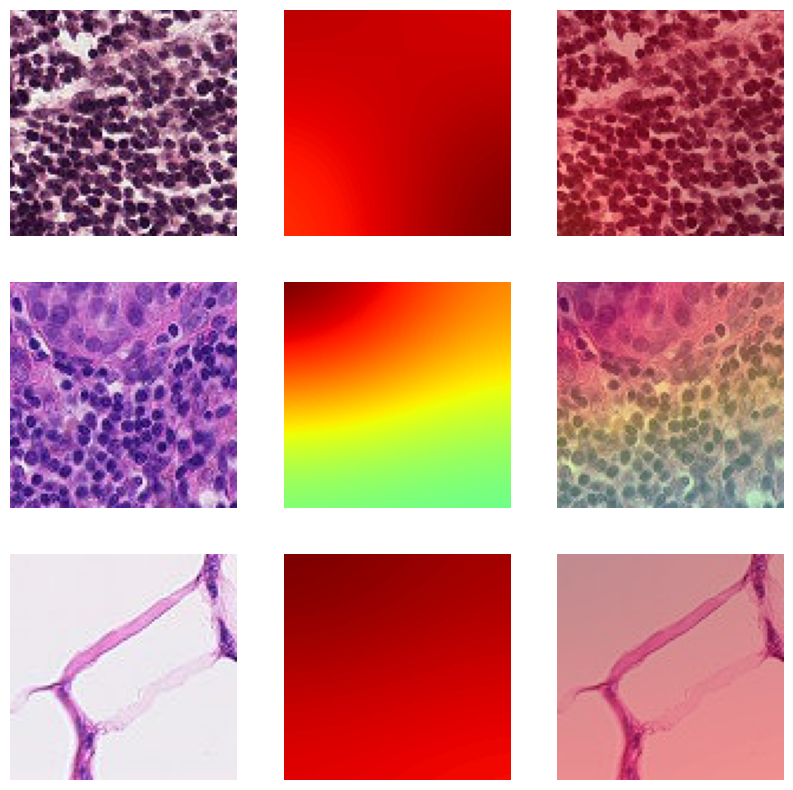

In [23]:
plot_heatmap()